In [1]:
import os

import torch
from torch import nn
from torchvision import transforms

from data import create_dataloaders
from engine import train
from utils import plot_loss_curves, calculate_performance
from model import (
    ShallowModel,
    DeepModel,
    DeepModelNormalized,
    OptimumModel
)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

/home/abtin/anaconda3/envs/torchspace/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
NUM_WORKERS = os.cpu_count()
transformer = transforms.Compose([transforms.ToTensor()])
train_dataloader, val_dataloader, test_dataloader, class_names = create_dataloaders(transformer, 32, NUM_WORKERS)

Files already downloaded and verified
Files already downloaded and verified
class names:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
length train data:  40000 
length validation data:  10000 
length test data:  10000


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

Image size: torch.Size([3, 32, 32])
Label: 6, label size: torch.Size([])


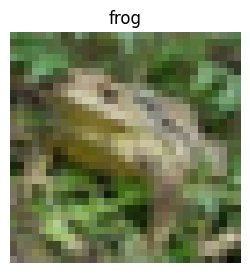

In [12]:
import matplotlib.pyplot as plt

torch.manual_seed(2)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.figure(figsize=(3, 3))
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [3]:
import pandas as pd

result_columns = ['Model Name', 'f1 score', 'precision', 'recall']
result_df = pd.DataFrame(columns=result_columns)
result_model_names = ['Shallow network',
                      'Deeper network', 
                      'Shallow network with higher number of neurons in each hidden layer', 
                      'Deep network using batch normalization layers',
                      'optimum model'
]
index = 0

## Effect of depth

In [4]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
shallow_model = ShallowModel(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=shallow_model.parameters(), lr=0.001)

In [5]:
results_shallow = train(
    shallow_model,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=20,
    device=device)

  5%|██▏                                         | 1/20 [00:05<01:52,  5.90s/it]

Epoch: 1 | train_loss: 1.6217 | train_acc: 0.4249 | test_loss: 1.4263 | test_acc: 0.4979



 10%|████▍                                       | 2/20 [00:10<01:37,  5.41s/it]

Epoch: 2 | train_loss: 1.3443 | train_acc: 0.5249 | test_loss: 1.3172 | test_acc: 0.5264



 15%|██████▌                                     | 3/20 [00:15<01:28,  5.23s/it]

Epoch: 3 | train_loss: 1.2303 | train_acc: 0.5682 | test_loss: 1.2367 | test_acc: 0.5616



 20%|████████▊                                   | 4/20 [00:20<01:22,  5.13s/it]

Epoch: 4 | train_loss: 1.1536 | train_acc: 0.5999 | test_loss: 1.1883 | test_acc: 0.5798



 25%|███████████                                 | 5/20 [00:25<01:16,  5.09s/it]

Epoch: 5 | train_loss: 1.1020 | train_acc: 0.6169 | test_loss: 1.1598 | test_acc: 0.5937



 30%|█████████████▏                              | 6/20 [00:30<01:10,  5.06s/it]

Epoch: 6 | train_loss: 1.0580 | train_acc: 0.6341 | test_loss: 1.1532 | test_acc: 0.5906



 35%|███████████████▍                            | 7/20 [00:36<01:05,  5.07s/it]

Epoch: 7 | train_loss: 1.0202 | train_acc: 0.6459 | test_loss: 1.1286 | test_acc: 0.6028



 40%|█████████████████▌                          | 8/20 [00:41<01:00,  5.05s/it]

Epoch: 8 | train_loss: 0.9765 | train_acc: 0.6605 | test_loss: 1.1320 | test_acc: 0.6076



 45%|███████████████████▊                        | 9/20 [00:46<00:55,  5.03s/it]

Epoch: 9 | train_loss: 0.9430 | train_acc: 0.6724 | test_loss: 1.1178 | test_acc: 0.6118



 50%|█████████████████████▌                     | 10/20 [00:51<00:50,  5.01s/it]

Epoch: 10 | train_loss: 0.9169 | train_acc: 0.6816 | test_loss: 1.1283 | test_acc: 0.6091



 55%|███████████████████████▋                   | 11/20 [00:56<00:45,  5.03s/it]

Epoch: 11 | train_loss: 0.8955 | train_acc: 0.6903 | test_loss: 1.0967 | test_acc: 0.6235



 60%|█████████████████████████▊                 | 12/20 [01:01<00:40,  5.02s/it]

Epoch: 12 | train_loss: 0.8775 | train_acc: 0.6962 | test_loss: 1.0941 | test_acc: 0.6237



 65%|███████████████████████████▉               | 13/20 [01:06<00:35,  5.02s/it]

Epoch: 13 | train_loss: 0.8581 | train_acc: 0.7039 | test_loss: 1.1169 | test_acc: 0.6144



 70%|██████████████████████████████             | 14/20 [01:11<00:30,  5.02s/it]

Epoch: 14 | train_loss: 0.8437 | train_acc: 0.7071 | test_loss: 1.1405 | test_acc: 0.6039



 75%|████████████████████████████████▎          | 15/20 [01:16<00:24,  4.99s/it]

Epoch: 15 | train_loss: 0.8311 | train_acc: 0.7121 | test_loss: 1.1086 | test_acc: 0.6183



 80%|██████████████████████████████████▍        | 16/20 [01:21<00:19,  5.00s/it]

Epoch: 16 | train_loss: 0.8176 | train_acc: 0.7156 | test_loss: 1.1266 | test_acc: 0.6161



 85%|████████████████████████████████████▌      | 17/20 [01:26<00:14,  4.99s/it]

Epoch: 17 | train_loss: 0.8061 | train_acc: 0.7206 | test_loss: 1.1336 | test_acc: 0.6190



 90%|██████████████████████████████████████▋    | 18/20 [01:31<00:10,  5.02s/it]

Epoch: 18 | train_loss: 0.7973 | train_acc: 0.7229 | test_loss: 1.1624 | test_acc: 0.6085



 95%|████████████████████████████████████████▊  | 19/20 [01:36<00:05,  5.00s/it]

Epoch: 19 | train_loss: 0.7848 | train_acc: 0.7282 | test_loss: 1.1399 | test_acc: 0.6120


100%|███████████████████████████████████████████| 20/20 [01:41<00:00,  5.06s/it]

Epoch: 20 | train_loss: 0.7784 | train_acc: 0.7303 | test_loss: 1.1782 | test_acc: 0.6066


In [6]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
deep_model = DeepModel(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=deep_model.parameters(), lr=0.001)

In [7]:
results_deep = train(
    deep_model,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=20,
    device=device)

  5%|██▏                                         | 1/20 [00:07<02:29,  7.88s/it]

Epoch: 1 | train_loss: 1.8828 | train_acc: 0.3071 | test_loss: 1.6501 | test_acc: 0.3967



 10%|████▍                                       | 2/20 [00:15<02:24,  8.02s/it]

Epoch: 2 | train_loss: 1.5583 | train_acc: 0.4355 | test_loss: 1.5069 | test_acc: 0.4488



 15%|██████▌                                     | 3/20 [00:23<02:15,  7.97s/it]

Epoch: 3 | train_loss: 1.4421 | train_acc: 0.4793 | test_loss: 1.3733 | test_acc: 0.5033



 20%|████████▊                                   | 4/20 [00:31<02:06,  7.91s/it]

Epoch: 4 | train_loss: 1.3673 | train_acc: 0.5069 | test_loss: 1.3289 | test_acc: 0.5211



 25%|███████████                                 | 5/20 [00:39<01:58,  7.90s/it]

Epoch: 5 | train_loss: 1.3008 | train_acc: 0.5312 | test_loss: 1.2626 | test_acc: 0.5432



 30%|█████████████▏                              | 6/20 [00:47<01:48,  7.76s/it]

Epoch: 6 | train_loss: 1.2457 | train_acc: 0.5565 | test_loss: 1.2242 | test_acc: 0.5625



 35%|███████████████▍                            | 7/20 [00:54<01:40,  7.74s/it]

Epoch: 7 | train_loss: 1.2044 | train_acc: 0.5711 | test_loss: 1.2273 | test_acc: 0.5569



 40%|█████████████████▌                          | 8/20 [01:02<01:33,  7.79s/it]

Epoch: 8 | train_loss: 1.1581 | train_acc: 0.5864 | test_loss: 1.1680 | test_acc: 0.5844



 45%|███████████████████▊                        | 9/20 [01:10<01:25,  7.79s/it]

Epoch: 9 | train_loss: 1.1264 | train_acc: 0.5978 | test_loss: 1.1758 | test_acc: 0.5857



 50%|█████████████████████▌                     | 10/20 [01:18<01:18,  7.89s/it]

Epoch: 10 | train_loss: 1.0955 | train_acc: 0.6105 | test_loss: 1.0995 | test_acc: 0.6097



 55%|███████████████████████▋                   | 11/20 [01:26<01:10,  7.85s/it]

Epoch: 11 | train_loss: 1.0720 | train_acc: 0.6196 | test_loss: 1.1120 | test_acc: 0.6039



 60%|█████████████████████████▊                 | 12/20 [01:34<01:02,  7.83s/it]

Epoch: 12 | train_loss: 1.0500 | train_acc: 0.6263 | test_loss: 1.1344 | test_acc: 0.6027



 65%|███████████████████████████▉               | 13/20 [01:41<00:54,  7.83s/it]

Epoch: 13 | train_loss: 1.0358 | train_acc: 0.6343 | test_loss: 1.0585 | test_acc: 0.6286



 70%|██████████████████████████████             | 14/20 [01:49<00:47,  7.87s/it]

Epoch: 14 | train_loss: 1.0171 | train_acc: 0.6413 | test_loss: 1.0604 | test_acc: 0.6205



 75%|████████████████████████████████▎          | 15/20 [01:57<00:39,  7.86s/it]

Epoch: 15 | train_loss: 1.0039 | train_acc: 0.6447 | test_loss: 1.0521 | test_acc: 0.6265



 80%|██████████████████████████████████▍        | 16/20 [02:05<00:31,  7.91s/it]

Epoch: 16 | train_loss: 0.9882 | train_acc: 0.6510 | test_loss: 1.0703 | test_acc: 0.6232



 85%|████████████████████████████████████▌      | 17/20 [02:13<00:23,  7.91s/it]

Epoch: 17 | train_loss: 0.9813 | train_acc: 0.6534 | test_loss: 1.0194 | test_acc: 0.6439



 90%|██████████████████████████████████████▋    | 18/20 [02:21<00:15,  7.97s/it]

Epoch: 18 | train_loss: 0.9664 | train_acc: 0.6589 | test_loss: 1.0533 | test_acc: 0.6301



 95%|████████████████████████████████████████▊  | 19/20 [02:29<00:07,  7.99s/it]

Epoch: 19 | train_loss: 0.9625 | train_acc: 0.6582 | test_loss: 1.0274 | test_acc: 0.6339


100%|███████████████████████████████████████████| 20/20 [02:37<00:00,  7.87s/it]

Epoch: 20 | train_loss: 0.9517 | train_acc: 0.6633 | test_loss: 1.0180 | test_acc: 0.6399


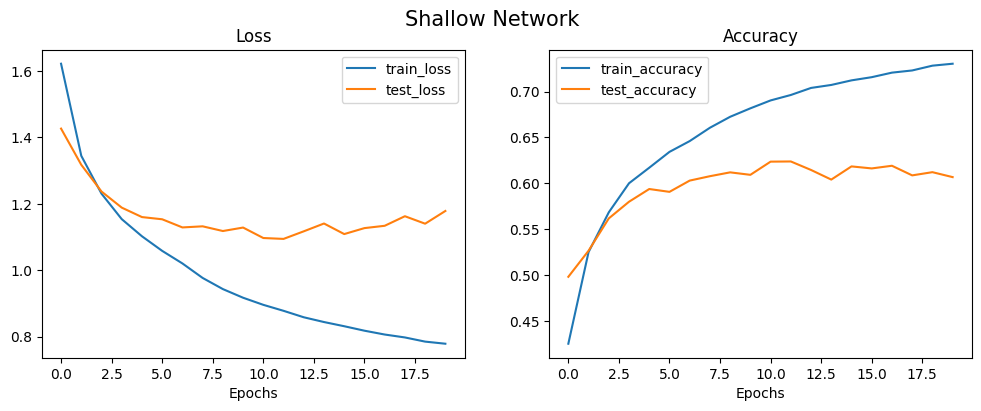

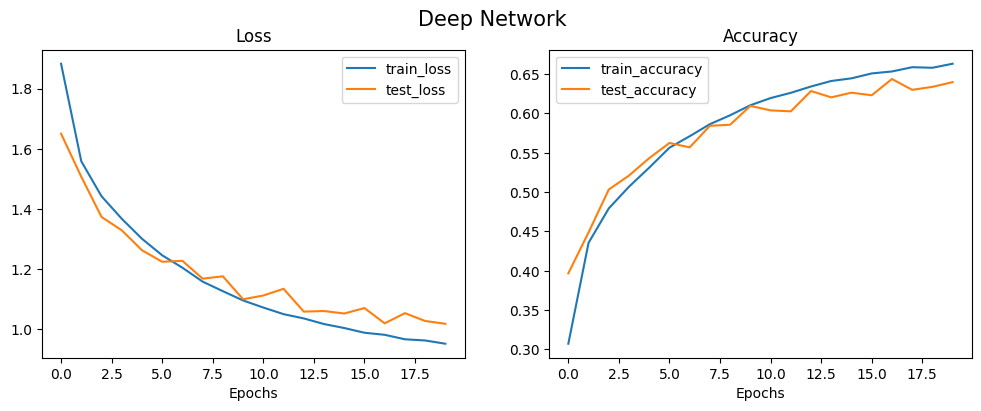

In [8]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_deep, title="Deep Network")

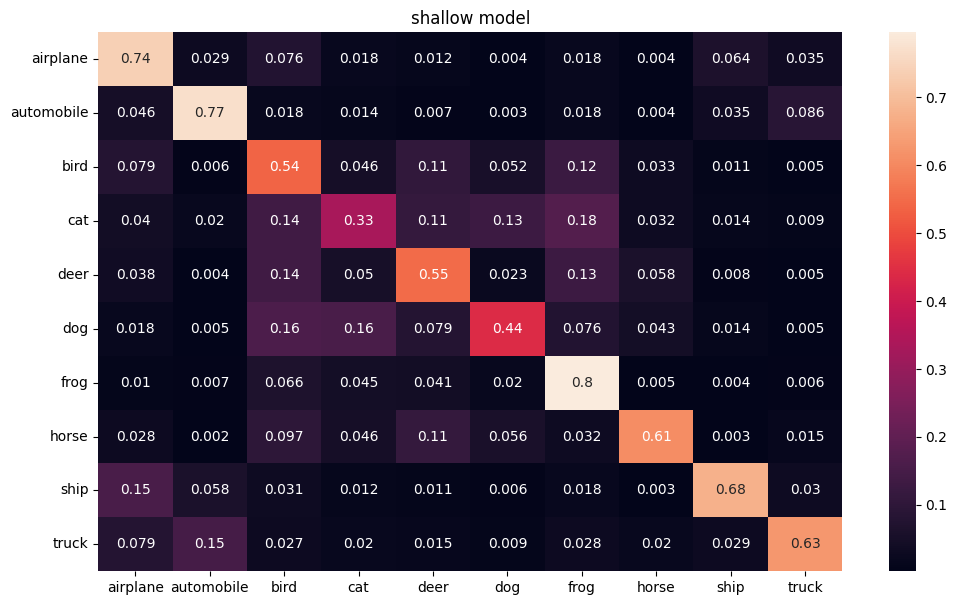

In [9]:
f1, precision, recall = calculate_performance(shallow_model, 
                                              test_dataloader, 
                                              device, 
                                              class_names, 
                                              "shallow model")
result_df.loc[index, 'Model Name'] = result_model_names[index]
result_df.loc[index, 'f1 score'] = f1
result_df.loc[index, 'precision'] = precision
result_df.loc[index, 'recall'] = recall
index += 1

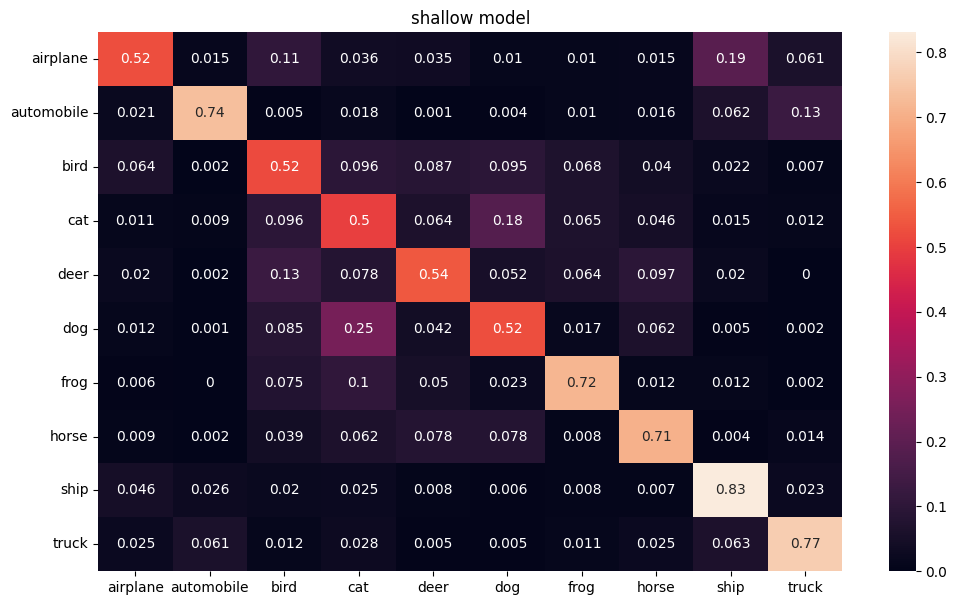

In [10]:
f1, precision, recall = calculate_performance(deep_model, 
                                              test_dataloader, 
                                              device, 
                                              class_names, 
                                              "shallow model")
result_df.loc[index, 'Model Name'] = result_model_names[index]
result_df.loc[index, 'f1 score'] = f1
result_df.loc[index, 'precision'] = precision
result_df.loc[index, 'recall'] = recall
index += 1

## Effect number of nuerons

In [11]:
torch.manual_seed(42)
shallow_model_high_neuron = ShallowModel(
    input_shape=3,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=shallow_model_high_neuron.parameters(), lr=0.001)

In [12]:
results_shallow_high_neuron = train(
    shallow_model_high_neuron,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=20,
    device=device)

  5%|██▏                                         | 1/20 [00:09<02:56,  9.30s/it]

Epoch: 1 | train_loss: 1.4470 | train_acc: 0.4859 | test_loss: 1.2470 | test_acc: 0.5573



 10%|████▍                                       | 2/20 [00:18<02:46,  9.26s/it]

Epoch: 2 | train_loss: 1.1611 | train_acc: 0.5964 | test_loss: 1.1267 | test_acc: 0.6092



 15%|██████▌                                     | 3/20 [00:27<02:37,  9.24s/it]

Epoch: 3 | train_loss: 1.0233 | train_acc: 0.6466 | test_loss: 1.0778 | test_acc: 0.6169



 20%|████████▊                                   | 4/20 [00:36<02:27,  9.23s/it]

Epoch: 4 | train_loss: 0.9291 | train_acc: 0.6797 | test_loss: 1.0422 | test_acc: 0.6373



 25%|███████████                                 | 5/20 [00:46<02:18,  9.20s/it]

Epoch: 5 | train_loss: 0.8630 | train_acc: 0.7031 | test_loss: 1.1295 | test_acc: 0.6191



 30%|█████████████▏                              | 6/20 [00:55<02:08,  9.21s/it]

Epoch: 6 | train_loss: 0.8090 | train_acc: 0.7212 | test_loss: 1.0747 | test_acc: 0.6399



 35%|███████████████▍                            | 7/20 [01:04<01:59,  9.19s/it]

Epoch: 7 | train_loss: 0.7637 | train_acc: 0.7373 | test_loss: 1.0754 | test_acc: 0.6436



 40%|█████████████████▌                          | 8/20 [01:13<01:50,  9.21s/it]

Epoch: 8 | train_loss: 0.7214 | train_acc: 0.7510 | test_loss: 1.0669 | test_acc: 0.6483



 45%|███████████████████▊                        | 9/20 [01:23<01:41,  9.23s/it]

Epoch: 9 | train_loss: 0.6890 | train_acc: 0.7612 | test_loss: 1.0912 | test_acc: 0.6369



 50%|█████████████████████▌                     | 10/20 [01:32<01:32,  9.20s/it]

Epoch: 10 | train_loss: 0.6559 | train_acc: 0.7709 | test_loss: 1.1352 | test_acc: 0.6418



 55%|███████████████████████▋                   | 11/20 [01:41<01:22,  9.21s/it]

Epoch: 11 | train_loss: 0.6258 | train_acc: 0.7830 | test_loss: 1.1827 | test_acc: 0.6304



 60%|█████████████████████████▊                 | 12/20 [01:50<01:13,  9.23s/it]

Epoch: 12 | train_loss: 0.6001 | train_acc: 0.7901 | test_loss: 1.1539 | test_acc: 0.6319



 65%|███████████████████████████▉               | 13/20 [01:59<01:04,  9.23s/it]

Epoch: 13 | train_loss: 0.5761 | train_acc: 0.7985 | test_loss: 1.1933 | test_acc: 0.6378



 70%|██████████████████████████████             | 14/20 [02:09<00:55,  9.22s/it]

Epoch: 14 | train_loss: 0.5534 | train_acc: 0.8050 | test_loss: 1.2377 | test_acc: 0.6300



 75%|████████████████████████████████▎          | 15/20 [02:18<00:46,  9.22s/it]

Epoch: 15 | train_loss: 0.5299 | train_acc: 0.8145 | test_loss: 1.2853 | test_acc: 0.6252



 80%|██████████████████████████████████▍        | 16/20 [02:27<00:36,  9.22s/it]

Epoch: 16 | train_loss: 0.5070 | train_acc: 0.8214 | test_loss: 1.3088 | test_acc: 0.6247



 85%|████████████████████████████████████▌      | 17/20 [02:36<00:27,  9.21s/it]

Epoch: 17 | train_loss: 0.4893 | train_acc: 0.8282 | test_loss: 1.3694 | test_acc: 0.6292



 90%|██████████████████████████████████████▋    | 18/20 [02:45<00:18,  9.20s/it]

Epoch: 18 | train_loss: 0.4697 | train_acc: 0.8344 | test_loss: 1.4151 | test_acc: 0.6217



 95%|████████████████████████████████████████▊  | 19/20 [02:55<00:09,  9.22s/it]

Epoch: 19 | train_loss: 0.4564 | train_acc: 0.8379 | test_loss: 1.4693 | test_acc: 0.6261


100%|███████████████████████████████████████████| 20/20 [03:04<00:00,  9.22s/it]

Epoch: 20 | train_loss: 0.4416 | train_acc: 0.8446 | test_loss: 1.5324 | test_acc: 0.6141


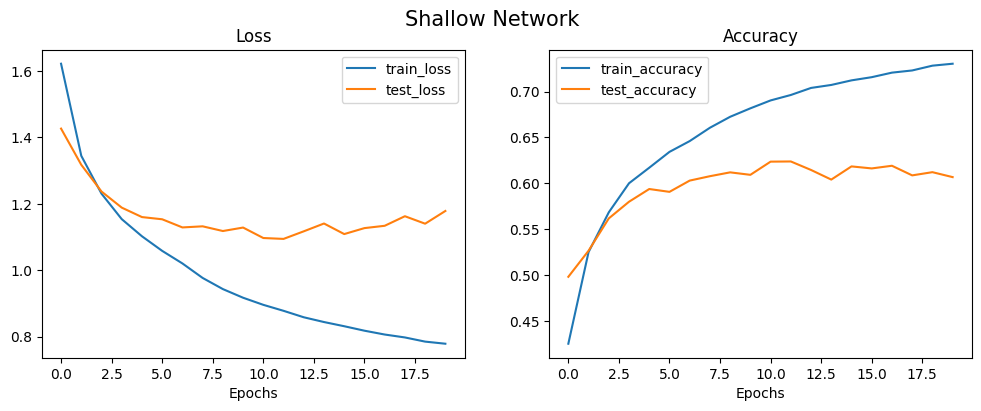

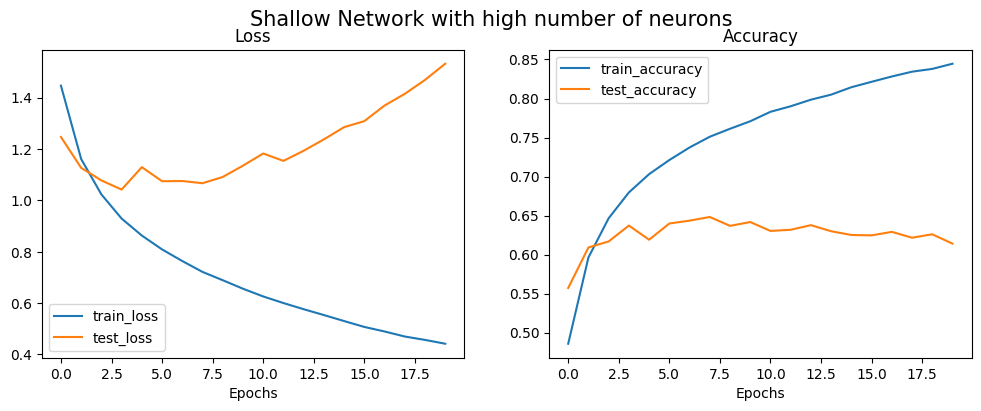

In [13]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_high_neuron, title="Shallow Network with high number of neurons")

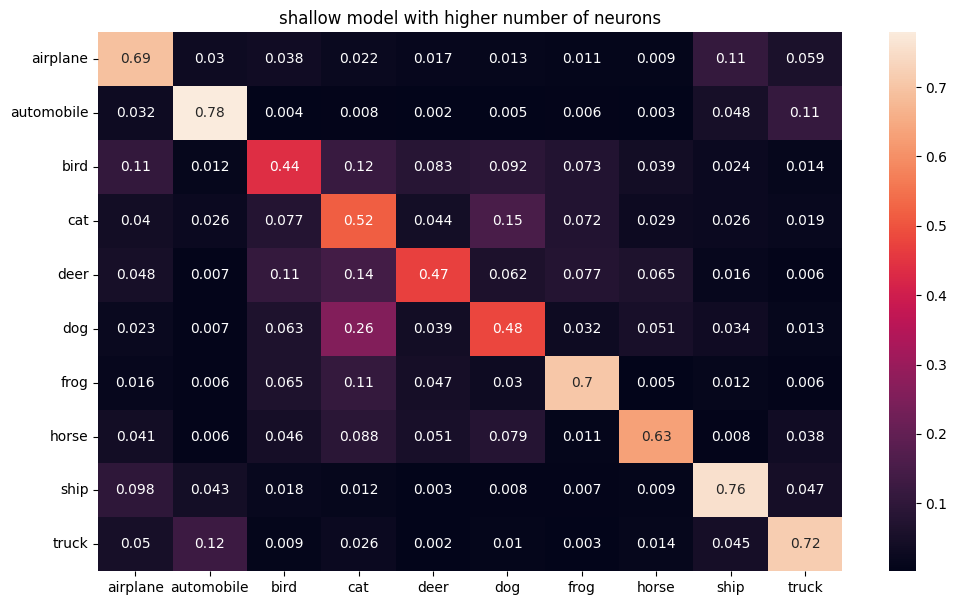

In [14]:
f1, precision, recall = calculate_performance(shallow_model_high_neuron, 
                                              test_dataloader, 
                                              device, 
                                              class_names, 
                                              "shallow model with higher number of neurons")
result_df.loc[index, 'Model Name'] = result_model_names[index]
result_df.loc[index, 'f1 score'] = f1
result_df.loc[index, 'precision'] = precision
result_df.loc[index, 'recall'] = recall
index += 1

## Effect of Batch Normalization

In [15]:
torch.manual_seed(42)
deep_model_normalized = DeepModelNormalized(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=deep_model_normalized.parameters(), lr=0.001)

In [16]:
results_deep_normalized = train(
    deep_model_normalized,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=20,
    device=device)

  5%|██▏                                         | 1/20 [00:10<03:18, 10.45s/it]

Epoch: 1 | train_loss: 1.5320 | train_acc: 0.4425 | test_loss: 1.3646 | test_acc: 0.5099



 10%|████▍                                       | 2/20 [00:20<03:05, 10.32s/it]

Epoch: 2 | train_loss: 1.2204 | train_acc: 0.5629 | test_loss: 1.1631 | test_acc: 0.5814



 15%|██████▌                                     | 3/20 [00:30<02:53, 10.20s/it]

Epoch: 3 | train_loss: 1.0898 | train_acc: 0.6151 | test_loss: 1.0713 | test_acc: 0.6206



 20%|████████▊                                   | 4/20 [00:40<02:43, 10.20s/it]

Epoch: 4 | train_loss: 1.0203 | train_acc: 0.6395 | test_loss: 1.0344 | test_acc: 0.6323



 25%|███████████                                 | 5/20 [00:51<02:34, 10.29s/it]

Epoch: 5 | train_loss: 0.9721 | train_acc: 0.6571 | test_loss: 0.9950 | test_acc: 0.6513



 30%|█████████████▏                              | 6/20 [01:01<02:24, 10.34s/it]

Epoch: 6 | train_loss: 0.9434 | train_acc: 0.6657 | test_loss: 0.9725 | test_acc: 0.6564



 35%|███████████████▍                            | 7/20 [01:11<02:13, 10.28s/it]

Epoch: 7 | train_loss: 0.9193 | train_acc: 0.6763 | test_loss: 0.9577 | test_acc: 0.6627



 40%|█████████████████▌                          | 8/20 [01:22<02:02, 10.21s/it]

Epoch: 8 | train_loss: 0.8973 | train_acc: 0.6824 | test_loss: 0.9607 | test_acc: 0.6628



 45%|███████████████████▊                        | 9/20 [01:32<01:52, 10.21s/it]

Epoch: 9 | train_loss: 0.8799 | train_acc: 0.6897 | test_loss: 0.9505 | test_acc: 0.6731



 50%|█████████████████████▌                     | 10/20 [01:42<01:42, 10.28s/it]

Epoch: 10 | train_loss: 0.8626 | train_acc: 0.6956 | test_loss: 0.9776 | test_acc: 0.6560



 55%|███████████████████████▋                   | 11/20 [01:52<01:32, 10.22s/it]

Epoch: 11 | train_loss: 0.8538 | train_acc: 0.6981 | test_loss: 0.9113 | test_acc: 0.6770



 60%|█████████████████████████▊                 | 12/20 [02:02<01:21, 10.20s/it]

Epoch: 12 | train_loss: 0.8445 | train_acc: 0.7005 | test_loss: 0.8880 | test_acc: 0.6870



 65%|███████████████████████████▉               | 13/20 [02:13<01:11, 10.18s/it]

Epoch: 13 | train_loss: 0.8327 | train_acc: 0.7071 | test_loss: 0.8961 | test_acc: 0.6884



 70%|██████████████████████████████             | 14/20 [02:23<01:00, 10.14s/it]

Epoch: 14 | train_loss: 0.8238 | train_acc: 0.7105 | test_loss: 0.8986 | test_acc: 0.6872



 75%|████████████████████████████████▎          | 15/20 [02:33<00:51, 10.24s/it]

Epoch: 15 | train_loss: 0.8146 | train_acc: 0.7132 | test_loss: 0.8880 | test_acc: 0.6925



 80%|██████████████████████████████████▍        | 16/20 [02:43<00:40, 10.16s/it]

Epoch: 16 | train_loss: 0.8091 | train_acc: 0.7153 | test_loss: 0.9284 | test_acc: 0.6781



 85%|████████████████████████████████████▌      | 17/20 [02:53<00:30, 10.16s/it]

Epoch: 17 | train_loss: 0.7986 | train_acc: 0.7170 | test_loss: 0.8979 | test_acc: 0.6907



 90%|██████████████████████████████████████▋    | 18/20 [03:03<00:20, 10.14s/it]

Epoch: 18 | train_loss: 0.7931 | train_acc: 0.7204 | test_loss: 0.9051 | test_acc: 0.6862



 95%|████████████████████████████████████████▊  | 19/20 [03:13<00:10, 10.04s/it]

Epoch: 19 | train_loss: 0.7889 | train_acc: 0.7232 | test_loss: 0.8858 | test_acc: 0.6917


100%|███████████████████████████████████████████| 20/20 [03:23<00:00, 10.20s/it]

Epoch: 20 | train_loss: 0.7831 | train_acc: 0.7233 | test_loss: 0.9163 | test_acc: 0.6879


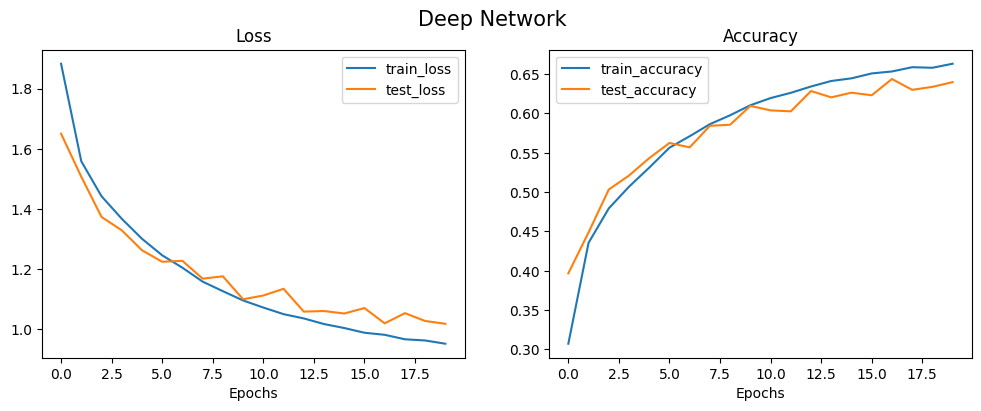

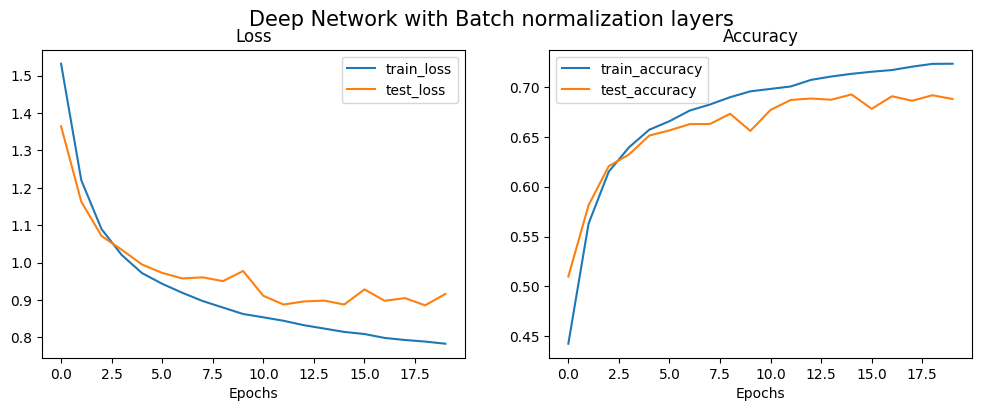

In [17]:
plot_loss_curves(results_deep, title="Deep Network")
plot_loss_curves(results_deep_normalized, title="Deep Network with Batch normalization layers")

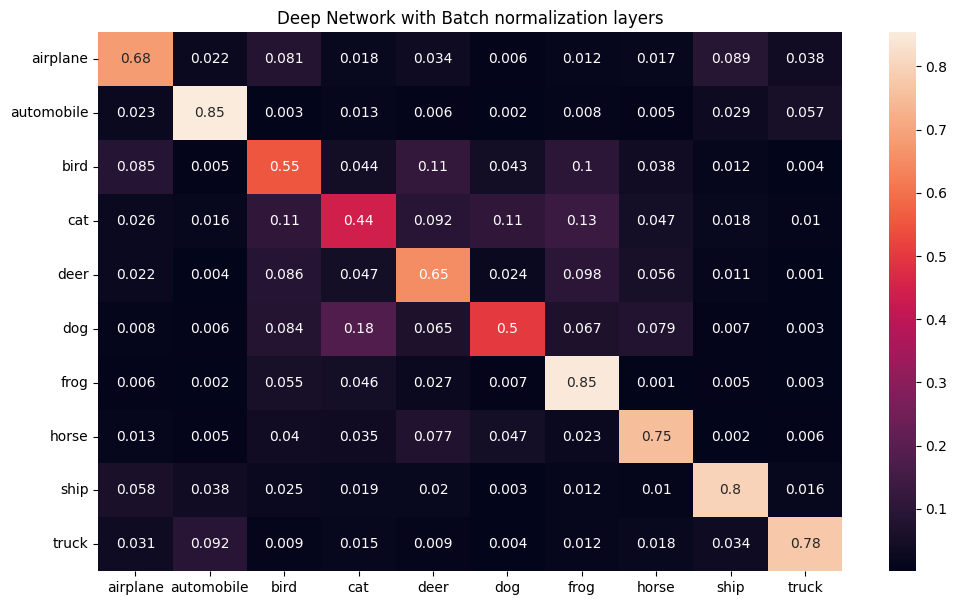

In [18]:
f1, precision, recall = calculate_performance(deep_model_normalized, 
                                              test_dataloader, 
                                              device, 
                                              class_names, 
                                              "Deep Network with Batch normalization layers")
result_df.loc[index, 'Model Name'] = result_model_names[index]
result_df.loc[index, 'f1 score'] = f1
result_df.loc[index, 'precision'] = precision
result_df.loc[index, 'recall'] = recall
index += 1

## Optimum model

In [25]:
torch.manual_seed(42)
optimum_model = OptimumModel(
    input_shape=3,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=optimum_model.parameters(), lr=0.001)

In [27]:
results_optimum_model = train(
    optimum_model,
    train_dataloader,
    val_dataloader,
    optimizer, 
    loss_fn,
    epochs=20,
    device=device)

  5%|██▏                                         | 1/20 [00:24<07:39, 24.19s/it]

Epoch: 1 | train_loss: 1.7067 | train_acc: 0.3932 | test_loss: 1.2923 | test_acc: 0.5256



 10%|████▍                                       | 2/20 [00:48<07:14, 24.15s/it]

Epoch: 2 | train_loss: 1.2207 | train_acc: 0.5764 | test_loss: 0.9579 | test_acc: 0.6662



 15%|██████▌                                     | 3/20 [01:12<06:48, 24.05s/it]

Epoch: 3 | train_loss: 1.0046 | train_acc: 0.6530 | test_loss: 0.8346 | test_acc: 0.7094



 20%|████████▊                                   | 4/20 [01:36<06:24, 24.04s/it]

Epoch: 4 | train_loss: 0.8727 | train_acc: 0.7061 | test_loss: 0.7390 | test_acc: 0.7488



 25%|███████████                                 | 5/20 [02:00<06:00, 24.04s/it]

Epoch: 5 | train_loss: 0.7776 | train_acc: 0.7380 | test_loss: 0.6419 | test_acc: 0.7812



 30%|█████████████▏                              | 6/20 [02:24<05:36, 24.03s/it]

Epoch: 6 | train_loss: 0.6901 | train_acc: 0.7684 | test_loss: 0.6071 | test_acc: 0.7946



 35%|███████████████▍                            | 7/20 [02:48<05:12, 24.03s/it]

Epoch: 7 | train_loss: 0.6317 | train_acc: 0.7870 | test_loss: 0.5843 | test_acc: 0.8025



 40%|█████████████████▌                          | 8/20 [03:12<04:48, 24.02s/it]

Epoch: 8 | train_loss: 0.5840 | train_acc: 0.8036 | test_loss: 0.5684 | test_acc: 0.8070



 45%|███████████████████▊                        | 9/20 [03:36<04:24, 24.04s/it]

Epoch: 9 | train_loss: 0.5252 | train_acc: 0.8231 | test_loss: 0.5243 | test_acc: 0.8227



 50%|█████████████████████▌                     | 10/20 [04:00<04:00, 24.04s/it]

Epoch: 10 | train_loss: 0.4820 | train_acc: 0.8367 | test_loss: 0.4982 | test_acc: 0.8301



 55%|███████████████████████▋                   | 11/20 [04:24<03:36, 24.06s/it]

Epoch: 11 | train_loss: 0.4449 | train_acc: 0.8498 | test_loss: 0.5085 | test_acc: 0.8292



 60%|█████████████████████████▊                 | 12/20 [04:48<03:12, 24.08s/it]

Epoch: 12 | train_loss: 0.4080 | train_acc: 0.8613 | test_loss: 0.5132 | test_acc: 0.8341



 65%|███████████████████████████▉               | 13/20 [05:12<02:48, 24.08s/it]

Epoch: 13 | train_loss: 0.3846 | train_acc: 0.8704 | test_loss: 0.4810 | test_acc: 0.8434



 70%|██████████████████████████████             | 14/20 [05:36<02:24, 24.07s/it]

Epoch: 14 | train_loss: 0.3496 | train_acc: 0.8806 | test_loss: 0.4853 | test_acc: 0.8446



 75%|████████████████████████████████▎          | 15/20 [06:00<02:00, 24.04s/it]

Epoch: 15 | train_loss: 0.3247 | train_acc: 0.8894 | test_loss: 0.5184 | test_acc: 0.8332



 80%|██████████████████████████████████▍        | 16/20 [06:24<01:36, 24.04s/it]

Epoch: 16 | train_loss: 0.3052 | train_acc: 0.8945 | test_loss: 0.5011 | test_acc: 0.8436



 85%|████████████████████████████████████▌      | 17/20 [06:48<01:12, 24.03s/it]

Epoch: 17 | train_loss: 0.2868 | train_acc: 0.9039 | test_loss: 0.4881 | test_acc: 0.8460



 90%|██████████████████████████████████████▋    | 18/20 [07:12<00:48, 24.06s/it]

Epoch: 18 | train_loss: 0.2640 | train_acc: 0.9088 | test_loss: 0.4907 | test_acc: 0.8480



 95%|████████████████████████████████████████▊  | 19/20 [07:36<00:24, 24.04s/it]

Epoch: 19 | train_loss: 0.2415 | train_acc: 0.9166 | test_loss: 0.4907 | test_acc: 0.8498


100%|███████████████████████████████████████████| 20/20 [08:00<00:00, 24.05s/it]

Epoch: 20 | train_loss: 0.2327 | train_acc: 0.9208 | test_loss: 0.5377 | test_acc: 0.8441


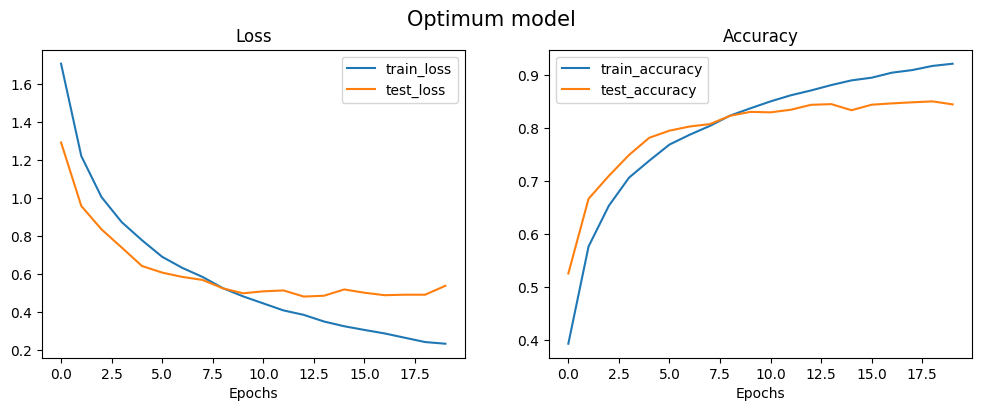

In [28]:
plot_loss_curves(results_optimum_model, title="Optimum model")

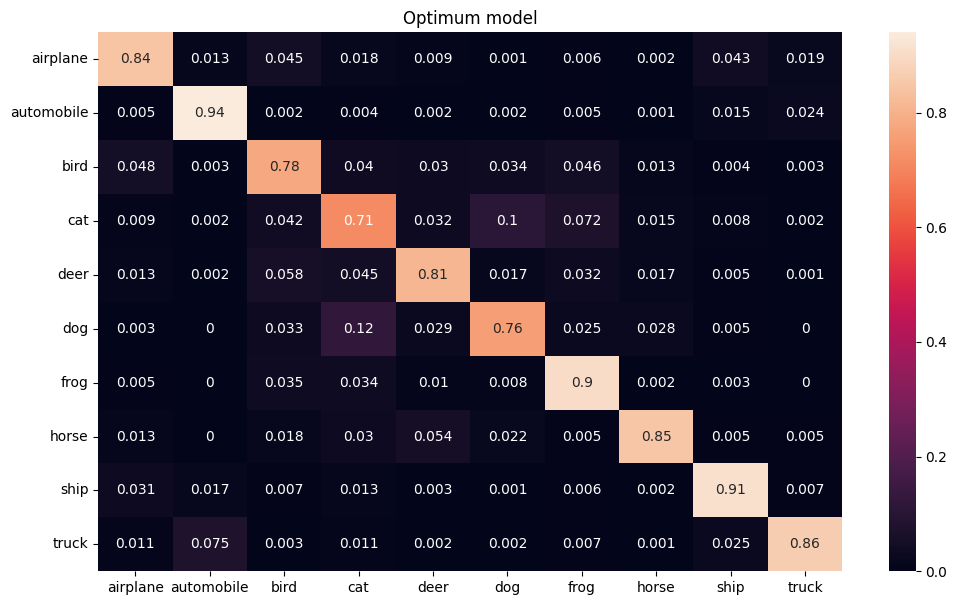

In [29]:
f1, precision, recall = calculate_performance(optimum_model, 
                                              test_dataloader, 
                                              device, 
                                              class_names, 
                                              "Optimum model")
result_df.loc[index, 'Model Name'] = result_model_names[index]
result_df.loc[index, 'f1 score'] = f1
result_df.loc[index, 'precision'] = precision
result_df.loc[index, 'recall'] = recall
index += 1

## Aggregating the resutls

In [30]:
result_df

,Model Name,f1 score,precision,recall
0,Shallow network,0.605433,0.618277,0.6074
1,Deeper network,0.637045,0.644913,0.6357
2,Shallow network with higher number of neurons ...,0.617804,0.623205,0.6183
3,Deep network using batch normalization layers,0.683238,0.68696,0.6861
4,optimum model,0.837095,0.838507,0.837


In [31]:
result_df.sort_values(by=['f1 score'], ascending=False, inplace=True)
result_df

,Model Name,f1 score,precision,recall
4,optimum model,0.837095,0.838507,0.837
3,Deep network using batch normalization layers,0.683238,0.68696,0.6861
1,Deeper network,0.637045,0.644913,0.6357
2,Shallow network with higher number of neurons ...,0.617804,0.623205,0.6183
0,Shallow network,0.605433,0.618277,0.6074
